<div style="background-color:#f0f4ff; border-left:6px solid #2962ff; padding:18px; margin:20px 0; font-size:15.5px; line-height:1.7; color:#0d47a1;">
  <h2 style="margin-top:0; color:#0d47a1;">📊 Exploratory Data Analysis (EDA): Product Demand Forecasting</h2>
  <p>This document outlines the exploratory data analysis performed on the product demand forecasting dataset. The analysis aims to uncover patterns, trends, and relationships that can inform future demand prediction models and business strategies.</p>

  <h1 style="font-size: 2.8em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    1. Introduction and Objectives
  </h1>
  <p>The primary objective of this EDA is to understand the factors influencing product demand. By visualizing the distributions and relationships within the dataset, we aim to identify key insights regarding:</p>
  
  <ul style="margin-left:20px;">
    <li>📈 Trends in <strong>UnitsSold</strong> over <strong>Date</strong>.</li>
    <li>🗺️ Impact of <strong>Location</strong> on <strong>UnitsSold</strong>.</li>
    <li>🎟️ Effectiveness of <strong>PromoCodeUsed</strong> on <strong>UnitsSold</strong>.</li>
    <li>📊 Distribution of <strong>UnitsSold</strong> and identification of potential outliers.</li>
    <li>🛒 Product-specific demand patterns by <strong>ProductID</strong>.</li>
  </ul>
</div>


<h1 style="font-size: 2.8em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    2. Data Overview (Summary Statistics & Data Types)
  </h1>

<div style="background-color:#fff8e1; border-left:6px solid #ffb300; padding:18px; margin:20px 0; font-size:15.5px; line-height:1.7; color:#6d4c41;">
  

  <h4 style="color:#e65100;">📌 Data Types:</h4>
  <ul style="margin-left:20px;">
    <li><strong>UnitsSold</strong>: Numerical (int or float)</li>
    <li><strong>Date</strong>: Datetime object</li>
    <li><strong>ProductID, Location, PromoCodeUsed</strong>: Categorical (string or object)</li>
  </ul>

  <h4 style="color:#e65100;">📊 Summary Statistics:</h4>
  <ul style="margin-left:20px;">
    <li><strong>UnitsSold</strong>:
      <ul style="margin-left:20px;">
        <li>Mean, Median</li>
        <li>Standard Deviation</li>
        <li>Minimum and Maximum</li>
        <li>Quartiles (Q1, Q2, Q3)</li>
      </ul>
    </li>
    <li><strong>Date</strong>: Minimum and Maximum dates to determine the dataset’s time range.</li>
    <li><strong>ProductID, Location, PromoCodeUsed</strong>: Count of unique values, most frequent (mode) values.</li>
  </ul>
</div>


<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #fefefe; color: #4A4A4A; line-height: 1.7; padding: 20px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.05); margin-top: 40px;">

  <h1 style="font-size: 2.6em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
    3. Univariate Analysis
  </h1>

  <p style="font-size: 1.2em; margin-bottom: 20px; font-weight: 400;">
    This section examines the characteristics of each variable independently.
  </p>

</div>


<h3 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:2.2em; color:#2E86C1; border-bottom:2px solid #1B4F72; padding-bottom:6px; margin-top:30px; margin-bottom:15px; font-weight:600;">
  3.1 Categorical Variables
</h3>

<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   ProductID Distribution:
</h4>



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\3_CLEANED DATA\sales_data_Cleaned.csv")

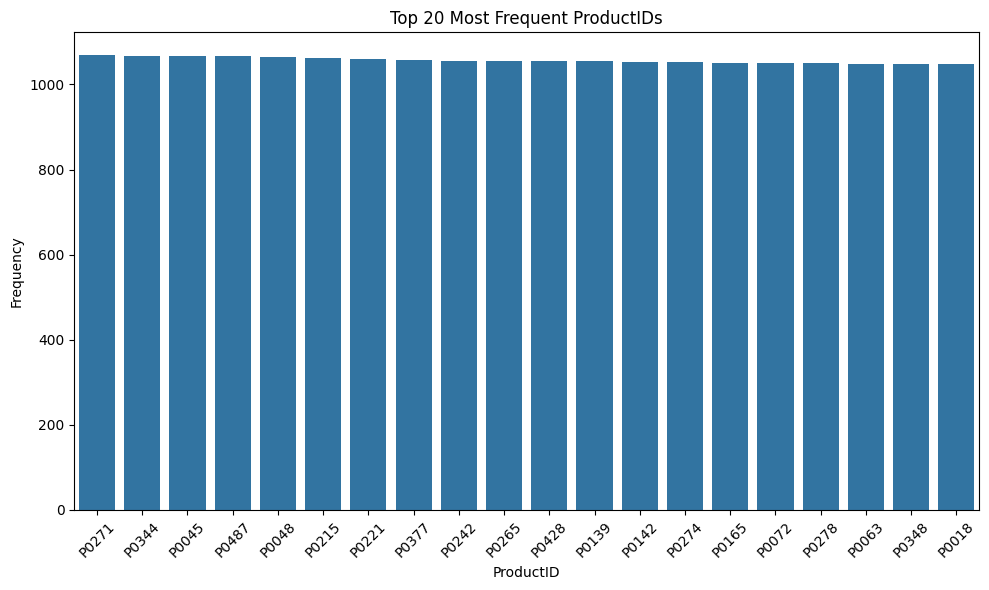

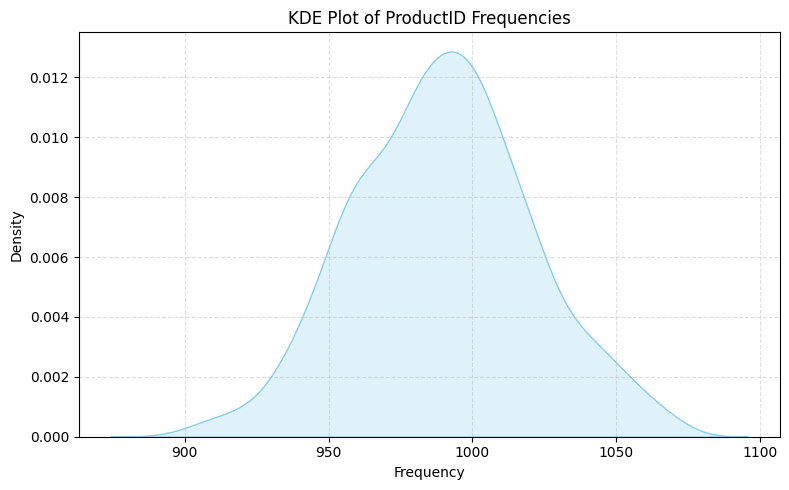

In [8]:
top_n = 20  # Change to 10 or 30 as needed

top_products = df['ProductID'].value_counts().nlargest(top_n).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['ProductID'].isin(top_products)], 
              x='ProductID', 
              order=top_products)
plt.title(f'Top {top_n} Most Frequent ProductIDs')
plt.xlabel('ProductID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
# Step 1: Get frequency counts of each ProductID
product_freq = df['ProductID'].value_counts()

# Step 2: KDE plot on those frequency values
plt.figure(figsize=(8, 5))
sns.kdeplot(product_freq, fill=True, color='skyblue')
plt.title('KDE Plot of ProductID Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



<div style="background-color:#e8f5e9; border-left:6px solid #43a047; padding:16px; margin:20px 0; font-size:15.5px; line-height:1.7; color:#2e7d32;">


  <h4 style="color:#1b5e20;">📈 KDE Plot - ProductID Frequencies</h4>
  <ul style="margin-left:20px;">
    <li>Unimodal shape with a peak around <strong>990–1000</strong>.</li>
    <li>Most values fall between <strong>950–1050</strong>.</li>
    <li>Slight left skew, but mostly symmetrical.</li>
  </ul>

  <h4 style="color:#1b5e20;">📊 Top 20 Most Frequent ProductIDs (Bar Chart)</h4>
  <ul style="margin-left:20px;">
    <li>All have frequencies <strong>above 1000</strong>.</li>
    <li>Very little variation — tightly clustered near <strong>1050–1100</strong>.</li>
    <li>Examples: <code>P0271, P0344, P0045</code>, etc.</li>
  </ul>

  <p><strong>🔍 Insight:</strong> ProductIDs show high and consistent frequency — suggesting a group of very popular products with nearly equal demand.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   Location Distribution:
</h4>

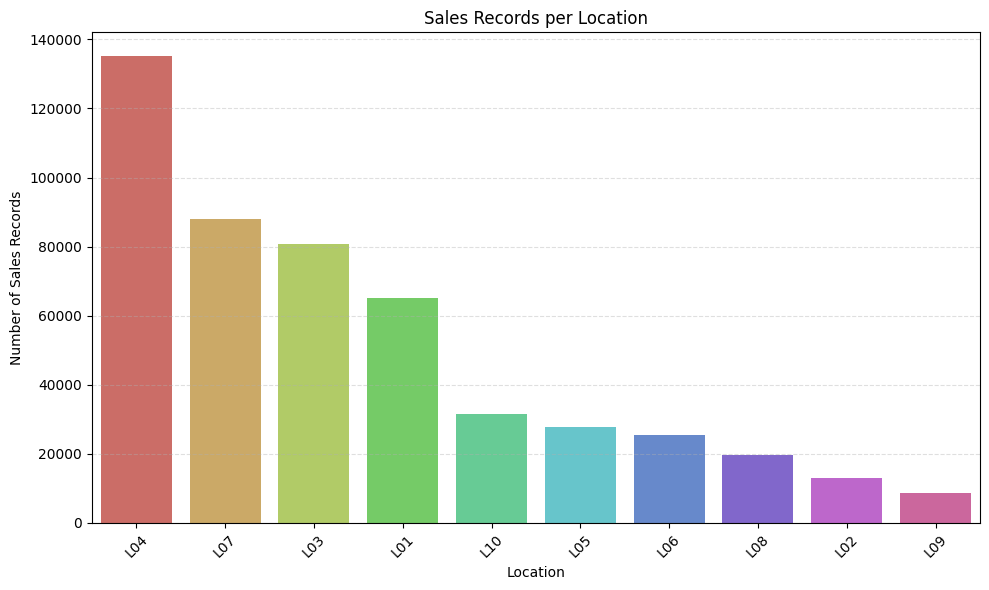

In [12]:
# Count the number of sales records per location
location_freq = df['Location'].value_counts()

plt.figure(figsize=(10, 6))

# Create a DataFrame first (if not already)
location_df = location_freq.reset_index()
location_df.columns = ['Location', 'Frequency']

sns.barplot(data=location_df, x='Location', y='Frequency', hue='Location',
            palette=sns.color_palette("hls", len(location_df)), legend=False)

plt.title('Sales Records per Location')
plt.xlabel('Location')
plt.ylabel('Number of Sales Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()





<div style="background-color:#e3f2fd; border-left:6px solid #1976d2; padding:16px; margin:20px 0; font-size:15.5px; line-height:1.7; color:#0d47a1;">
  <h3 style="margin-top:0; color:#0d47a1;">📊 Sales Records by Location</h3>

  <ul style="margin-left:20px;">
    <li><strong>L04</strong> leads with over <strong>135,000</strong> sales records — the highest by far.</li>
    <li><strong>L07</strong> and <strong>L03</strong> follow, each with around <strong>85,000–90,000</strong> records.</li>
    <li><strong>L01</strong> also performs well with over <strong>60,000</strong> records.</li>
    <li>Steep drop after top 4; others have much lower volumes.</li>
    <li><strong>L09</strong> has the fewest records — just under <strong>10,000</strong>.</li>
  </ul>

  <p><strong>🔍 Insight:</strong> A few locations (especially L04) dominate the sales activity, while others contribute relatively little.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   PromoCodeUsed Distribution:
</h4>

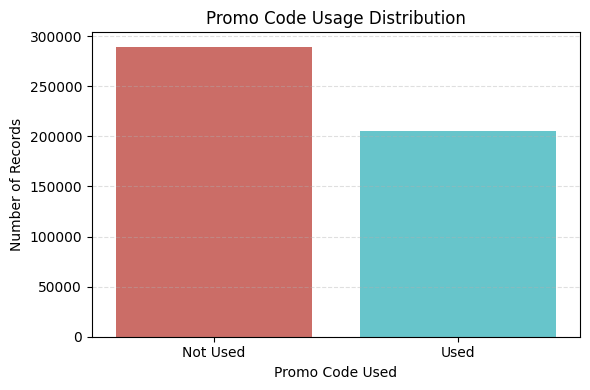

In [18]:
# Create a DataFrame for seaborn compatibility
promo_df = pd.DataFrame({
    'PromoCodeUsed': ['Not Used', 'Used'],
    'Count': df['PromoCodeUsed'].value_counts().sort_index().values
})

plt.figure(figsize=(6, 4))
sns.barplot(data=promo_df, x='PromoCodeUsed', y='Count', hue='PromoCodeUsed',
            palette=sns.color_palette("hls", len(promo_df)), legend=False)

plt.title('Promo Code Usage Distribution')
plt.xlabel('Promo Code Used')
plt.ylabel('Number of Records')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<div style="background-color:#fff3e0; border-left:6px solid #fb8c00; padding:16px; margin:20px 0; font-size:15.5px; line-height:1.7; color:#e65100;">
  <h3 style="margin-top:0; color:#e65100;">🏷️ Promo Code Usage Overview</h3>

  <ul style="margin-left:20px;">
    <li><strong>"Not Used"</strong> promo codes dominate, with around <strong>290,000</strong> records.</li>
    <li><strong>"Used"</strong> promo codes are fewer, appearing in about <strong>205,000</strong> records.</li>
    <li>The trend suggests promo codes were not used in the majority of the transactions.</li>
  </ul>

  <p><strong>🔍 Insight:</strong> Customers tend to place more orders without applying promo codes, which could signal opportunities to improve promo visibility or effectiveness.</p>
</div>


<h3 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:2.2em; color:#2E86C1; border-bottom:2px solid #1B4F72; padding-bottom:6px; margin-top:30px; margin-bottom:15px; font-weight:600;">
3.2 Numerical/Temporal Variables</h3>

<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   UnitSold Distribution:
</h4>



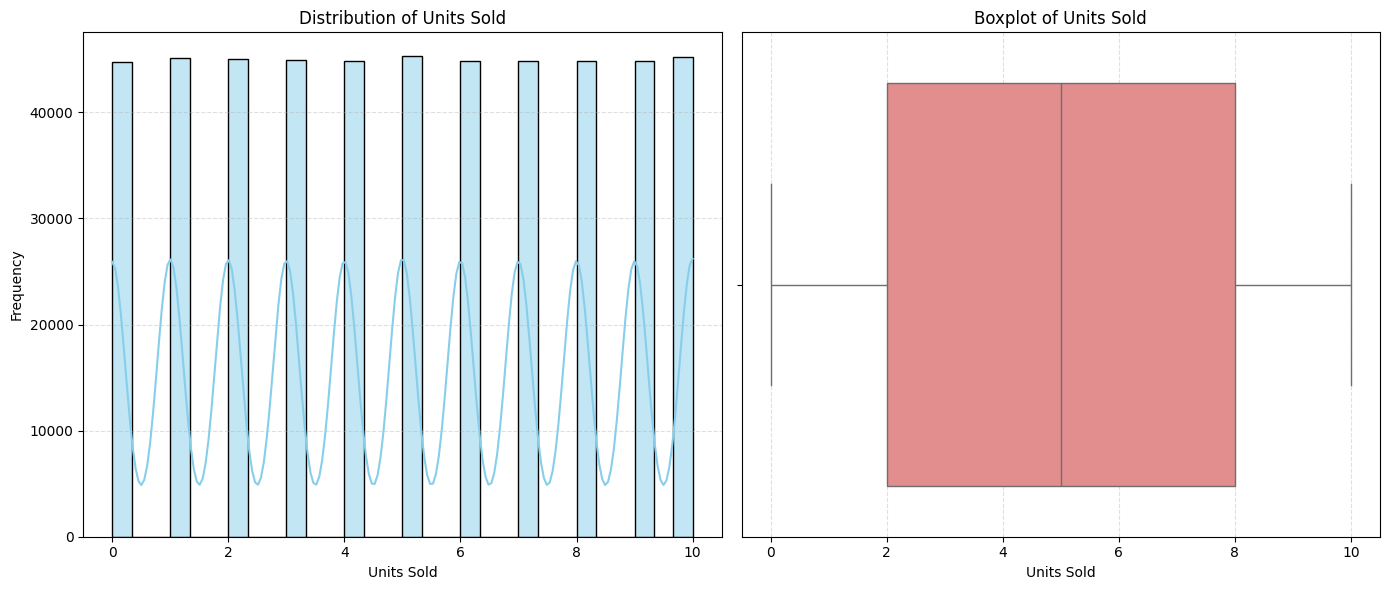

In [19]:

plt.figure(figsize=(14, 6))

# Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['UnitsSold'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)

# Boxplot for outlier detection
plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitsSold'], color='lightcoral')
plt.title('Boxplot of Units Sold')
plt.xlabel('Units Sold')
plt.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


<div style="background-color:#e3f2fd; border-left:6px solid #2196f3; padding:16px; margin:20px 0; font-size:15.5px; line-height:1.7; color:#0d47a1;">
  <h3 style="margin-top:0; color:#0d47a1;">📊 Units Sold Distribution Insights</h3>

  <h4>1️⃣ Histogram + KDE (Left Plot)</h4>
  <ul style="margin-left:20px;">
    <li>Bars show <strong>equal height</strong> (~45,000–46,000), suggesting a <strong>uniform distribution</strong> of values from 0 to 9.</li>
    <li>KDE curve (blue) has smooth waves, reflecting evenly spaced discrete data.</li>
    <li>Each value (0–9) is equally likely to occur.</li>
  </ul>

  <h4>2️⃣ Boxplot (Right Plot)</h4>
  <ul style="margin-left:20px;">
    <li><strong>Median:</strong> Around 4.5–5.0, consistent with uniform data.</li>
    <li><strong>IQR:</strong> From Q1 ≈ 2.0 to Q3 ≈ 7.0 (middle 50% of data).</li>
    <li><strong>Whiskers:</strong> Extend from 0 to 9 — the full data range.</li>
    <li><strong>No outliers</strong> detected — expected in a uniform distribution.</li>
  </ul>

  <p><strong>✅ Conclusion:</strong> Both plots confirm that "Units Sold" is uniformly distributed between 0 and 9, with no skew or outliers.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   Date (Temporal Trends):
</h4>

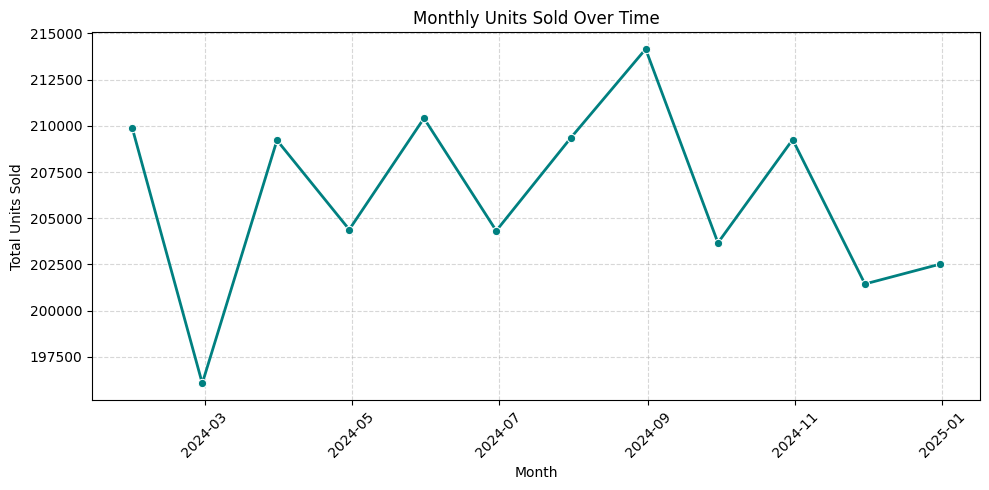

In [21]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Month and sum UnitsSold
monthly_sales = df.resample('ME', on='Date')['UnitsSold'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Date', y='UnitsSold', marker='o', linewidth=2, color='teal')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="border-radius:12px; background:linear-gradient(to right, #fdfdfd, #f5f7fa); padding:25px; border:2px solid #3498db; box-shadow:0 4px 12px rgba(0,0,0,0.1); font-family:'Segoe UI', sans-serif; color:#2c3e50; line-height:1.7;">
  <h2 style="font-size:24px; font-weight:600; margin-bottom:10px; color:#2c3e50;">📊 Monthly Units Sold Trend Analysis (Mar 2024 – Jan 2025)</h2>
  <p style="font-size:16px; margin-top:5px;">This line plot shows the <strong>Monthly Units Sold</strong> over time, covering the period from <strong>March 2024 to January 2025</strong>.</p>

  <h3 style="margin-top:20px; font-size:18px; color:#1a5276;">🔍 Trend Breakdown:</h3>
  <ul style="margin-left:20px; font-size:15px;">
    <li><strong>📉 Overall Fluctuation:</strong> Units sold vary significantly month to month, indicating a dynamic market rather than a smooth trend.</li>
    <li><strong>⛔ Initial Drop:</strong> A sharp drop is observed from <em>March 2024 (~210,000 units)</em> to <em>April 2024 (~196,000 units)</em>.</li>
    <li><strong>📈 Recovery and Peaks:</strong>
      <ul style="margin-top:6px;">
        <li>🔼 Sales steadily climb from April to June, reaching ~210,500 units.</li>
        <li>⚠️ Slight dip in July 2024, followed by a sharp spike in <strong>September 2024 (~214,000 units)</strong> — the peak month.</li>
      </ul>
    </li>
    <li><strong>📉 Decline and Minor Recovery:</strong>
      <ul style="margin-top:6px;">
        <li>🔻 October 2024 sees a sharp drop post-peak.</li>
        <li>🔁 November 2024 shows a minor recovery (~209,000 units).</li>
        <li>⬇️ December 2024 declines again, before a final small increase in January 2025 (~202,500 units).</li>
      </ul>
    </li>
  </ul>

  <div style="margin-top:20px; background-color:#eaf2f8; padding:15px; border-left:5px solid #3498db; border-radius:8px;">
    <strong>📌 Conclusion:</strong> The sales data reveals <em>seasonal or cyclical patterns</em> with clear peaks and troughs, highlighting the importance of timing in sales strategy. September 2024 marks the highest performance, with notable variances before and after.
  </div>
</div>



<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #fefefe; color: #4A4A4A; line-height: 1.7; padding: 20px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.05); margin-top: 40px;">

  <h1 style="font-size: 2.6em; color: #FF5733; border-bottom: 4px solid #C70039; padding-bottom: 15px; margin-bottom: 30px; font-weight: 700; text-shadow: 1px 1px 2px rgba(0,0,0,0.1);">
4. Bivariate Analysis (Relationships Between Variables)  </h1>

  <p style="font-size: 1.2em; margin-bottom: 20px; font-weight: 400;">
This section explores relationships between pairs of variables, focusing on how they influence <code>UnitsSold</code>.
  </p>

</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   UnitSold vs Location
</h4>

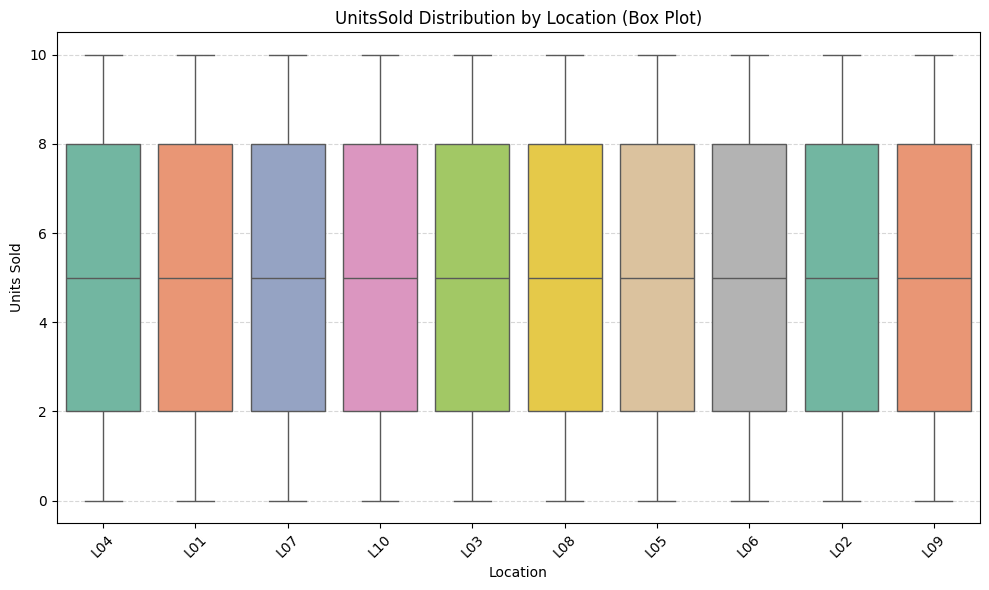

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='UnitsSold',hue='Location',legend=False, palette='Set2')
plt.title('UnitsSold Distribution by Location (Box Plot)')
plt.xlabel('Location')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


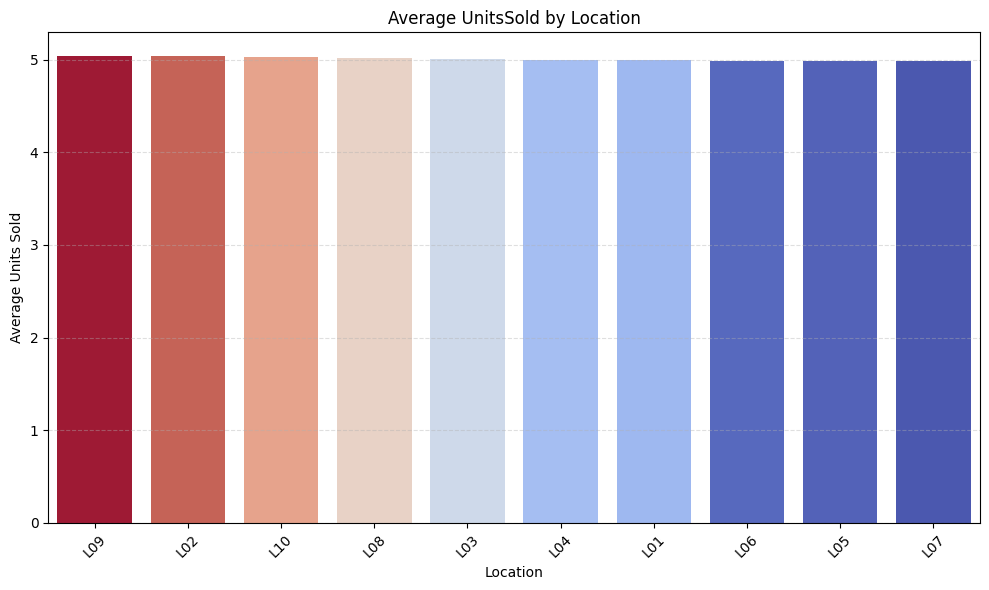

In [25]:
# Group by Location and calculate average UnitsSold
avg_units_by_location = df.groupby('Location')['UnitsSold'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_units_by_location.index, y=avg_units_by_location.values,hue=avg_units_by_location,legend=False, palette='coolwarm')
plt.title('Average UnitsSold by Location')
plt.xlabel('Location')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<!-- UnitsSold Distribution by Location (Box Plot) -->
<div style="border: 2px solid #4CAF50; padding: 16px; margin-bottom: 20px; border-radius: 8px; background-color: #f9fff9; color: #222;">
  <h3 style="color: #2e7d32;">📦 UnitsSold Distribution by Location (Box Plot)</h3>
  <ul>
    <li><strong>Median = 5 units</strong> across all locations.</li>
    <li><strong>IQR = 2 to 8 units</strong> → 50% sales fall in this range.</li>
    <li><strong>Whiskers = 0 to 10</strong> → No outliers, consistent spread.</li>
  </ul>
  <p><span style="color: #2e7d32; font-weight: bold;">Insight:</span> Distribution is <u>uniform across locations</u>.</p>


<!-- Average UnitsSold by Location (Bar Chart) -->

  <h3 style="color: #1565c0;">📊 Average UnitsSold by Location (Bar Chart)</h3>
  <ul>
    <li><strong>Average = 5 units</strong> for all locations.</li>
    <li><strong>Confirms box plot</strong> → Mean ≈ Median = 5.</li>
  </ul>
  <p><span style="color: #1565c0; font-weight: bold;">Insight:</span> <u>Consistent average units sold</u> across locations.</p>
</div>


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #1ceb65ff; margin-top:20px; margin-bottom:10px;">
   UnitSold vs PromoCodeUsed
</h4>

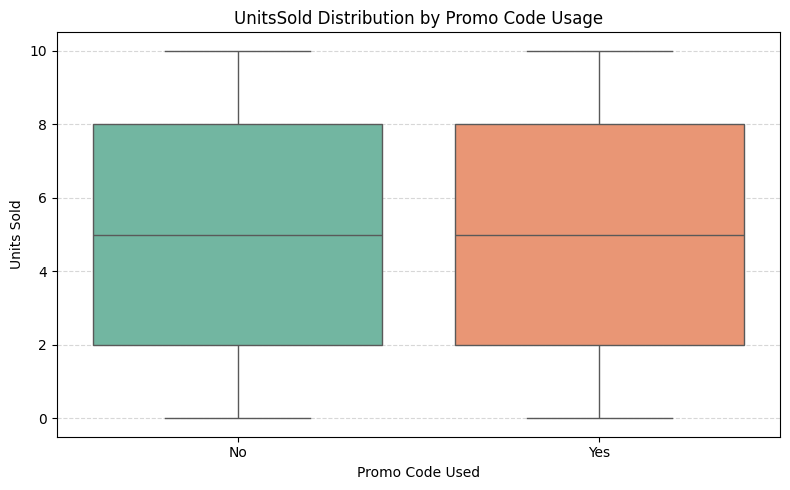

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='PromoCodeUsed', y='UnitsSold',hue='PromoCodeUsed',legend=False, palette='Set2')
plt.title('UnitsSold Distribution by Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Units Sold')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<!-- Units Sold Distribution by Promo Code Usage (Box Plot) -->
<div style="border: 2px solid #FF9800; padding: 16px; border-radius: 8px; background-color: #fff8e1; color: #222; margin-bottom: 20px;">
  <h3 style="color: #e65100;">🎁 Units Sold vs. Promo Code Usage (Box Plot)</h3>
  <ul>
    <li><strong>Similar Distributions:</strong> Both "Yes" and "No" show nearly identical spread.</li>
    <li><strong>Median:</strong> Centered at <strong>5 Units Sold</strong> for both groups.</li>
    <li><strong>IQR:</strong> Ranges from <strong>2 to 8 Units Sold</strong>.</li>
    <li><strong>Whiskers:</strong> Extend from <strong>0 to 10 Units Sold</strong> — no outliers.</li>
  </ul>
  <p><span style="color: #e65100; font-weight: bold;">Insight:</span> <u>Promo code usage doesn't influence units sold per transaction.</u></p>
</div>
